In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings
from scipy.stats import ttest_ind
from scipy.stats import t
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('inventory.db')

df = pd.read_sql("select * from vendor_sales_summary",conn)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,Volume,total_purchase_qty,total_purchase_dollars,Total_sales_qty,Total_sales_price,Total_sales_Dollers,Total_sales_excisetax,freightcost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchaseratio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,33.66,85.14,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
10688,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
10689,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
10690,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
total_purchase_qty,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
total_purchase_dollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
Total_sales_qty,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
Total_sales_price,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
Total_sales_Dollers,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


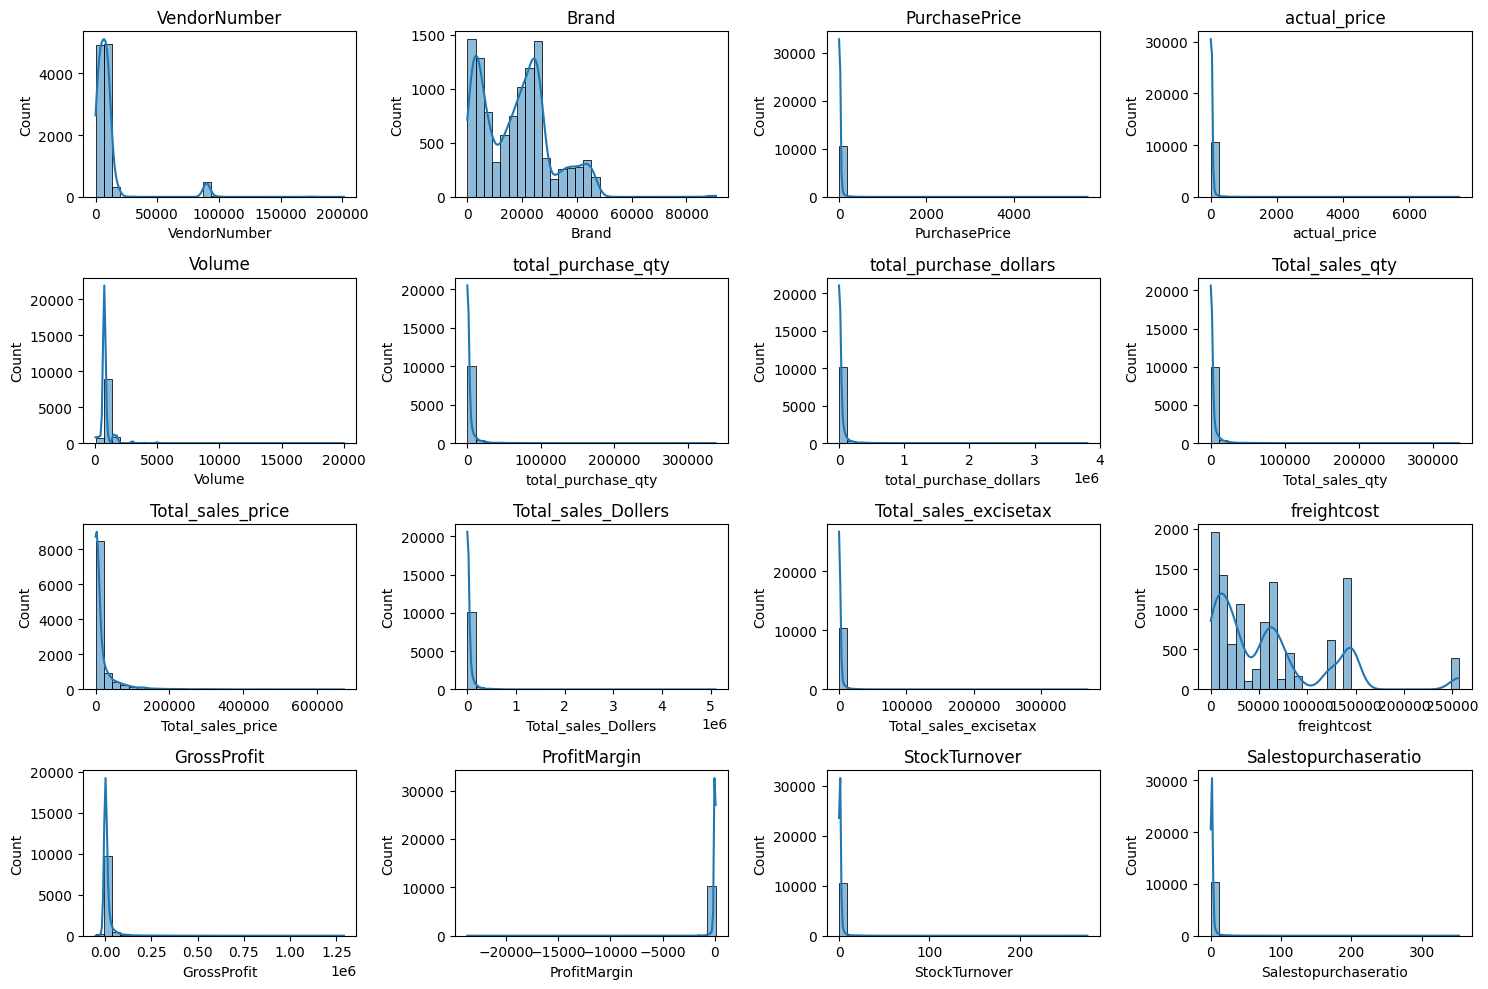

In [4]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col],kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

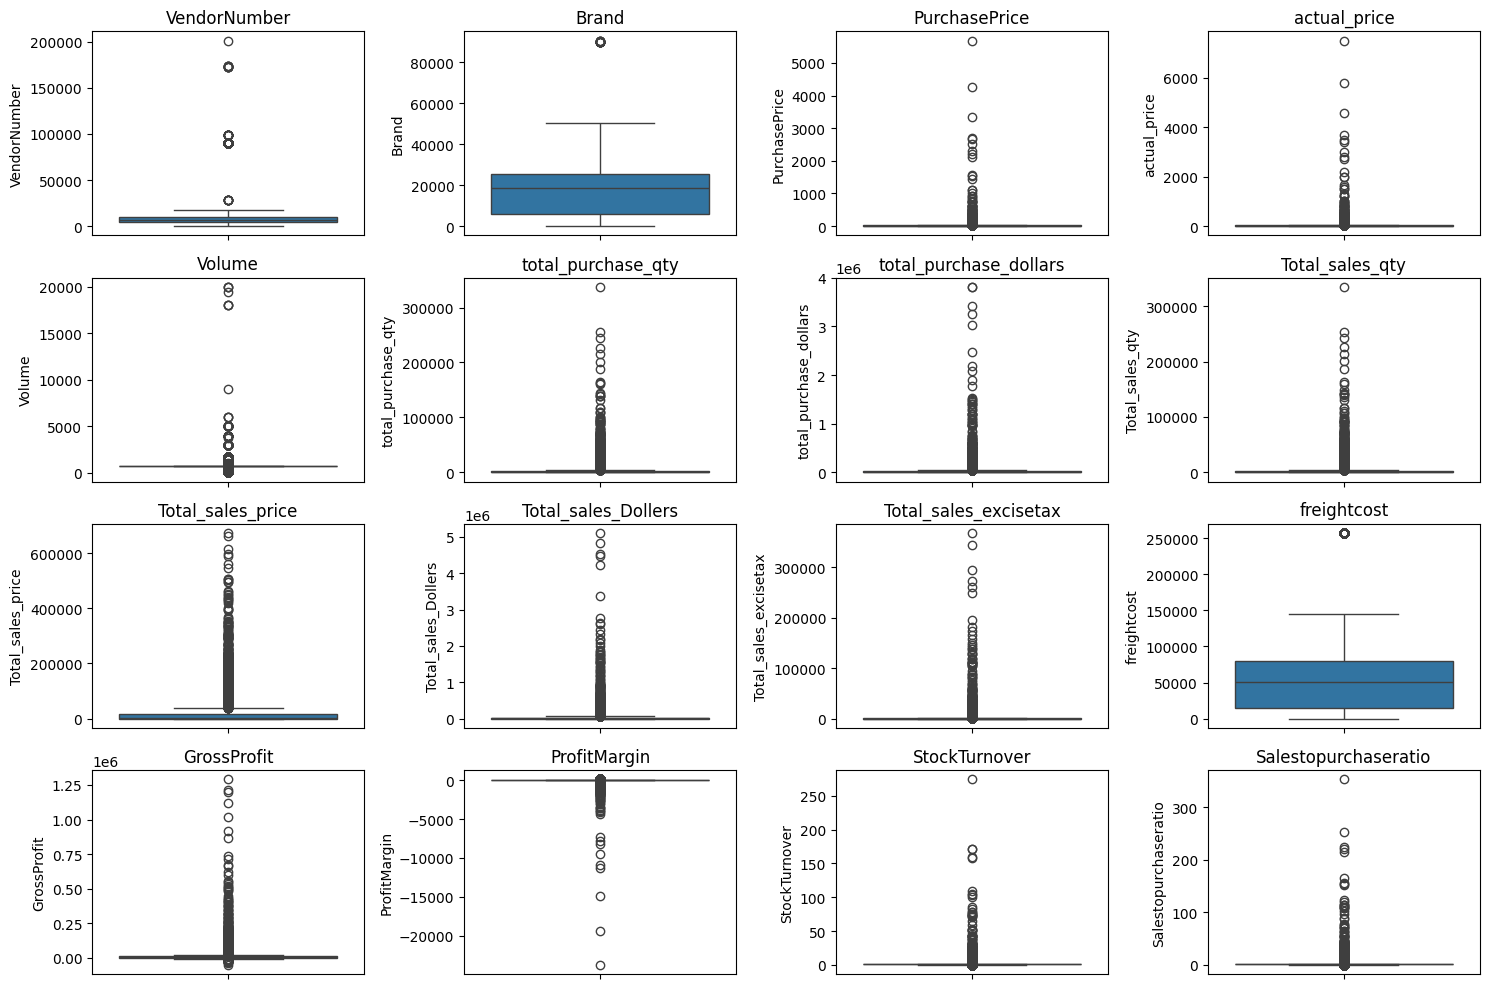

In [5]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:
Negative & Zero Values:

• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..

• Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

• Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

Outliers Indicated by High Standard Deviations:

• Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

• Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [6]:
df=pd.read_sql(""" select * from vendor_sales_summary 
               where GrossProfit > 0 and
               ProfitMargin >0 and
               Total_sales_qty>0""",conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,actual_price,Volume,total_purchase_qty,total_purchase_dollars,Total_sales_qty,Total_sales_price,Total_sales_Dollers,Total_sales_excisetax,freightcost,GrossProfit,ProfitMargin,StockTurnover,Salestopurchaseratio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,33.66,85.14,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
8560,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
8561,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
8562,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


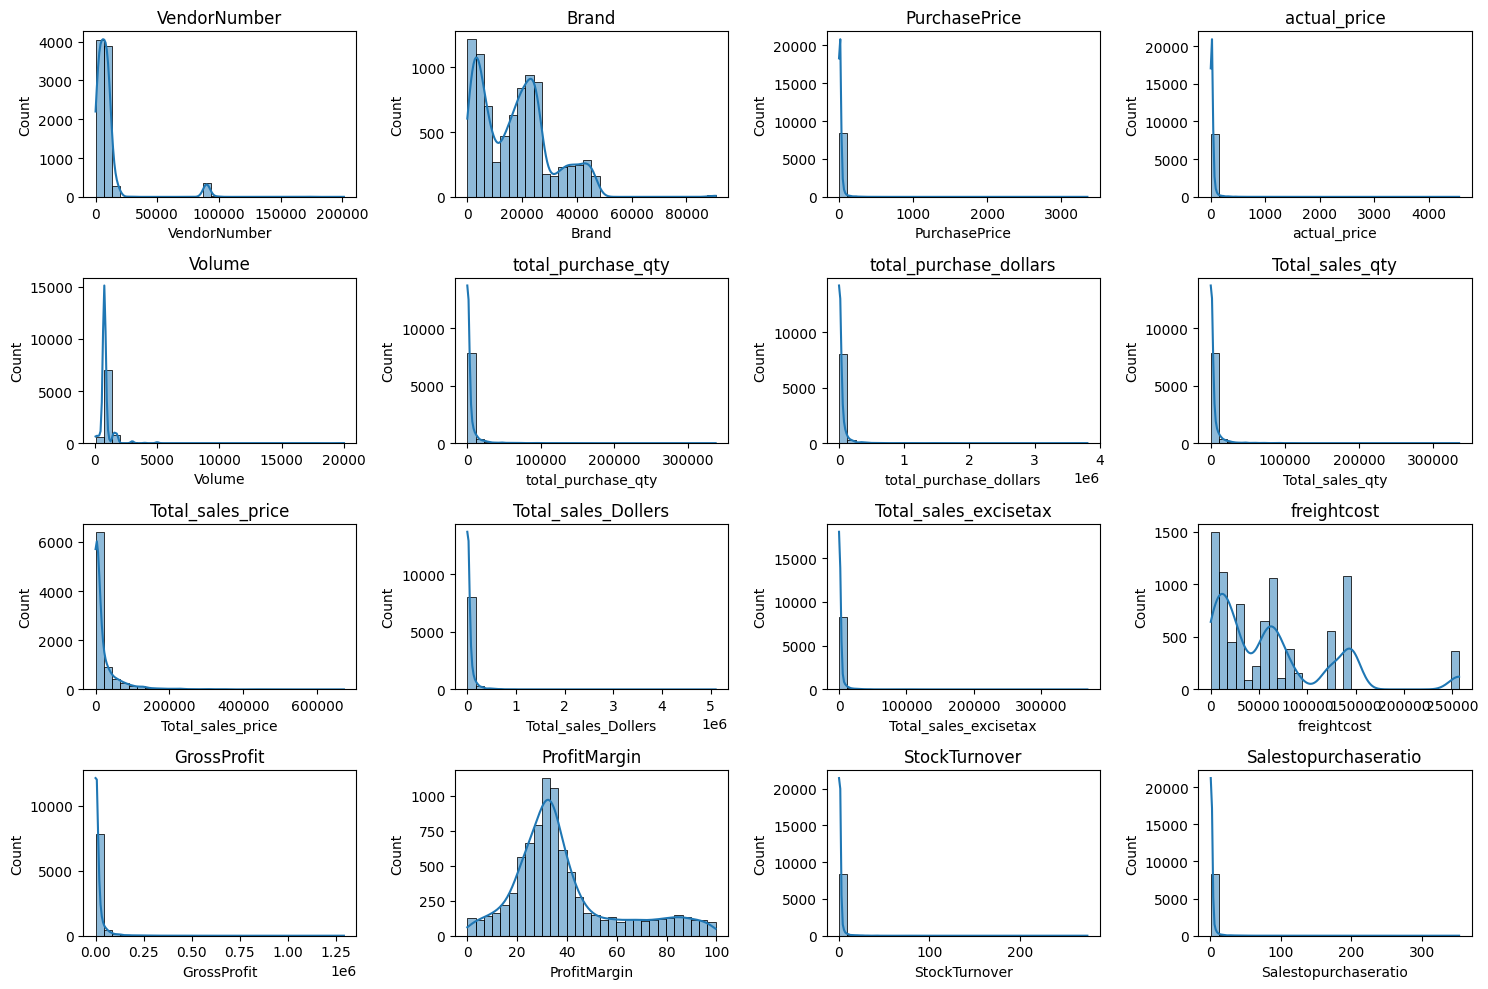

In [7]:
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col],kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

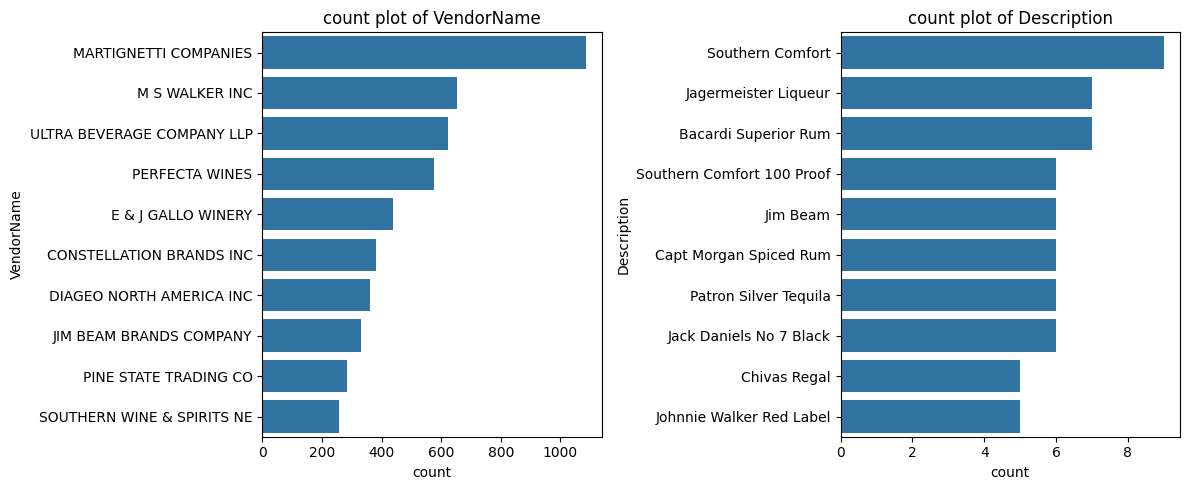

In [8]:
categorial_cols = ['VendorName','Description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorial_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f'count plot of {col}')
plt.tight_layout()
plt.show()

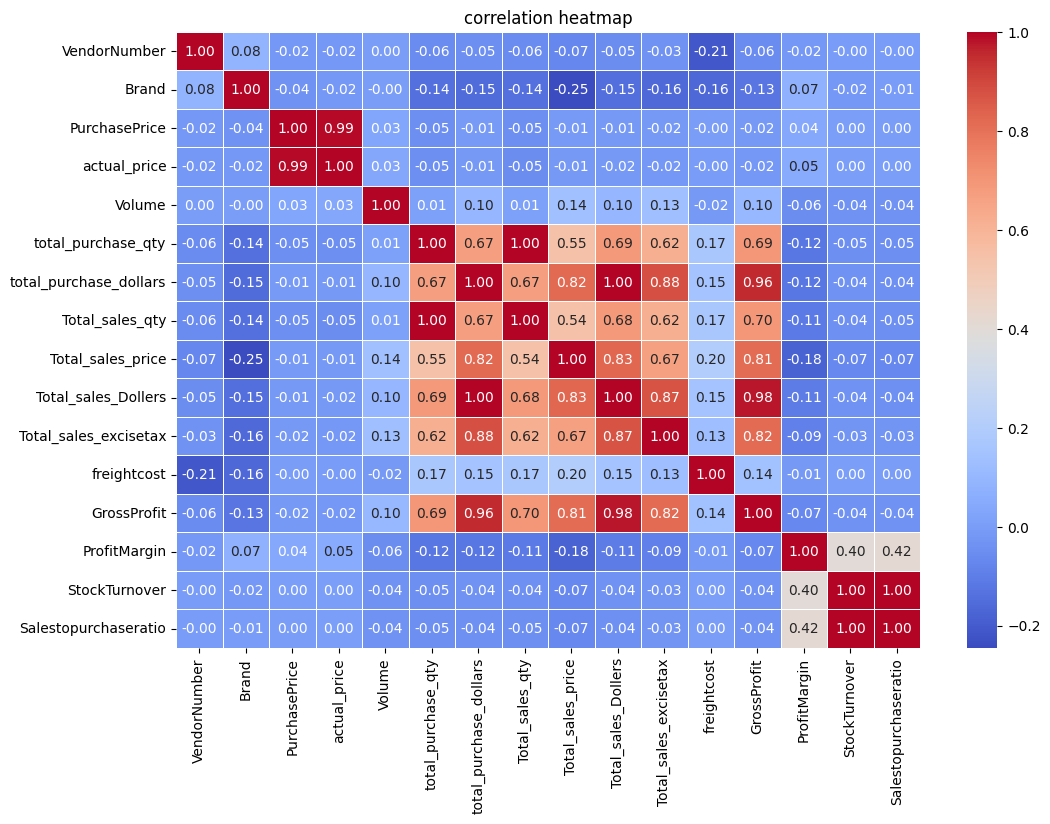

In [9]:
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth=0.5)
plt.title("correlation heatmap")
plt.show()

## - Correlation Insights
• PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

• Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

• Stock Turnover has weak negative correlations with both Gross Profit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysys
<b>Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins.<b>

In [10]:
brand_performance= df.groupby('Description').agg({
                        'Total_sales_Dollers':'sum',
                        'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,Total_sales_Dollers,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [11]:
low_sales_threshould = brand_performance['Total_sales_Dollers'].quantile(0.15)
high_margin_threshould = brand_performance['ProfitMargin'].quantile(0.85)

In [12]:
low_sales_threshould

np.float64(560.299)

In [13]:
high_margin_threshould

np.float64(64.97017552750113)

In [14]:
target_brands = brand_performance[
    (brand_performance['Total_sales_Dollers'] <= low_sales_threshould)&
    (brand_performance['ProfitMargin'] >= high_margin_threshould)
]
print("Brands with low sales but high profit margins")
display(target_brands.sort_values("Total_sales_Dollers"))

Brands with low sales but high profit margins


,Description,Total_sales_Dollers,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance = brand_performance [brand_performance['Total_sales_Dollers']<10000] # for better visualization

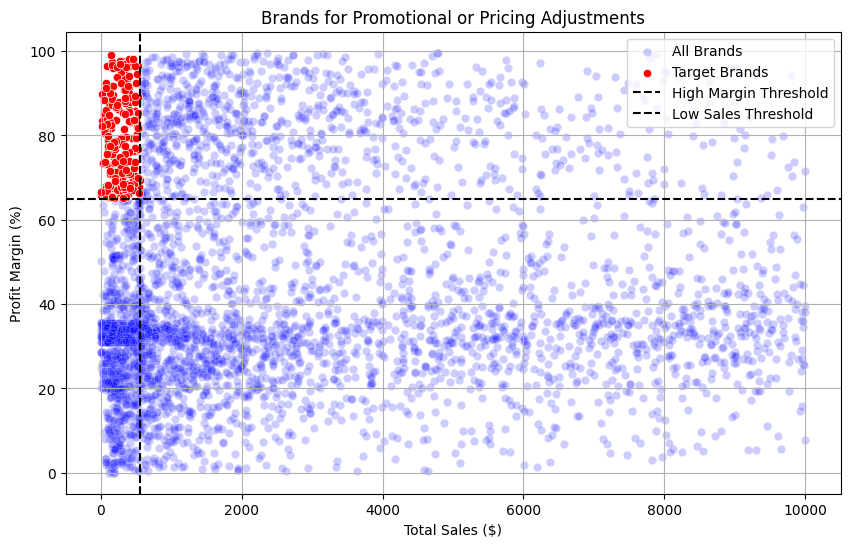

In [16]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='Total_sales_Dollers', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='Total_sales_Dollers', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshould, linestyle='--', color='black', label="High Margin Threshold") 
plt.axvline (low_sales_threshould, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")

plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

##### which Vendors and brands demonstrated the highest sales performance

In [17]:
def format_doller(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [18]:
topvendors = df.groupby("VendorName")["Total_sales_Dollers"].sum().nlargest(10)
topbrands = df.groupby("Description")["Total_sales_Dollers"].sum().nlargest(10)

In [19]:
topvendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: Total_sales_Dollers, dtype: float64

In [20]:
topbrands.apply(lambda x : format_doller(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: Total_sales_Dollers, dtype: object

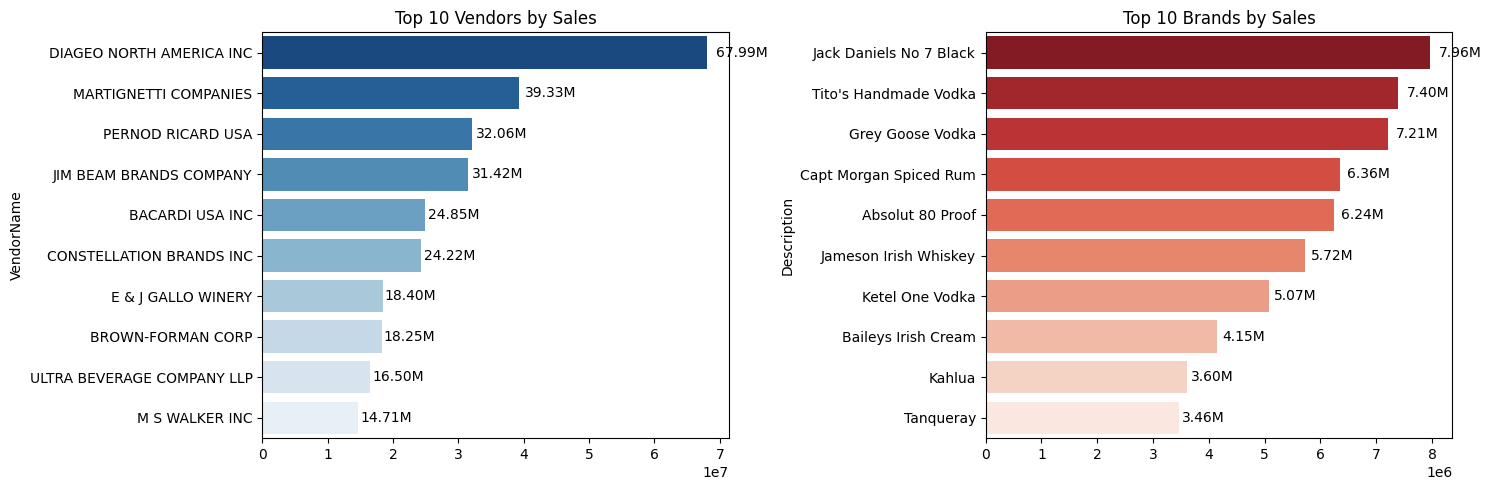

In [21]:
plt.figure(figsize=(15, 5))
# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot (y=topvendors.index, x=topvendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
    bar.get_y()+bar.get_height() / 2,
    format_doller(bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')
    # Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot (y=topbrands. index.astype(str), x=topbrands. values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
    bar.get_y()+bar.get_height() / 2,
    format_doller (bar.get_width()),
    ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

## which vendors contribute most to total purchase dollers

In [22]:
vendor_performance = df.groupby('VendorName').agg({
    'total_purchase_dollars':'sum',
    'GrossProfit':'sum',
    'Total_sales_Dollers':'sum'}).reset_index()

In [23]:
vendor_performance['purchasecontribution%'] = vendor_performance['total_purchase_dollars'] / vendor_performance['total_purchase_dollars'].sum()*100

In [24]:
vendor_performance = round(vendor_performance.sort_values('purchasecontribution%' , ascending = False),2)

In [25]:
top_vendors = vendor_performance.head(10)
top_vendors['total_purchase_dollars'] = top_vendors['total_purchase_dollars'].apply(format_doller)
top_vendors['Total_sales_Dollers'] = top_vendors['Total_sales_Dollers'].apply(format_doller)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_doller)
top_vendors

,VendorName,total_purchase_dollars,GrossProfit,Total_sales_Dollers,purchasecontribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [26]:
top_vendors['purchasecontribution%'].sum()

np.float64(65.69000000000001)

In [27]:
top_vendors['cumulative_contribution%'] = top_vendors['purchasecontribution%'].cumsum()
top_vendors

,VendorName,total_purchase_dollars,GrossProfit,Total_sales_Dollers,purchasecontribution%,cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


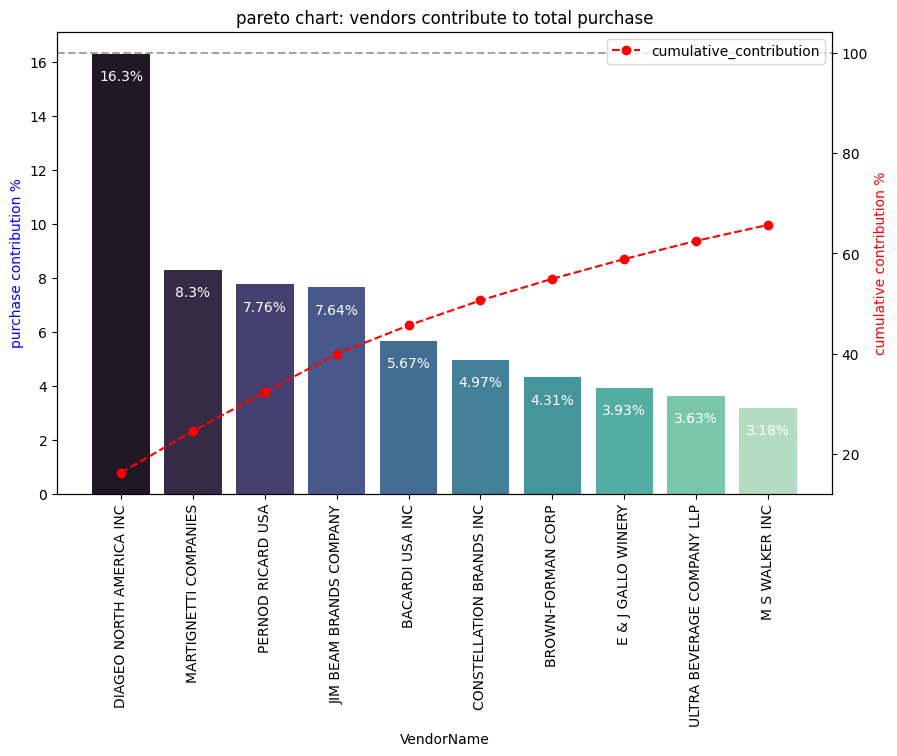

In [28]:
fig , ax1 = plt.subplots(figsize=(10,6))
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['purchasecontribution%'], palette="mako",ax=ax1)
for i, value in enumerate(top_vendors['purchasecontribution%']):
    ax1.text(i,value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['cumulative_contribution%'],color='red', marker='o', linestyle='dashed', label='cumulative_contribution')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('purchase contribution %',color='blue')
ax2.set_ylabel('cumulative contribution %',color='red')
ax1.set_title('pareto chart: vendors contribute to total purchase')

ax2.axhline(y=100, color='grey', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

#### HOW MUCH OF TOTAL PROCUREMENT IS DEPENDENT ON TOP VENDORS?

In [29]:
print(f"Total Purchase Contribution of top 10 vendors{round(top_vendors['purchasecontribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors65.69%


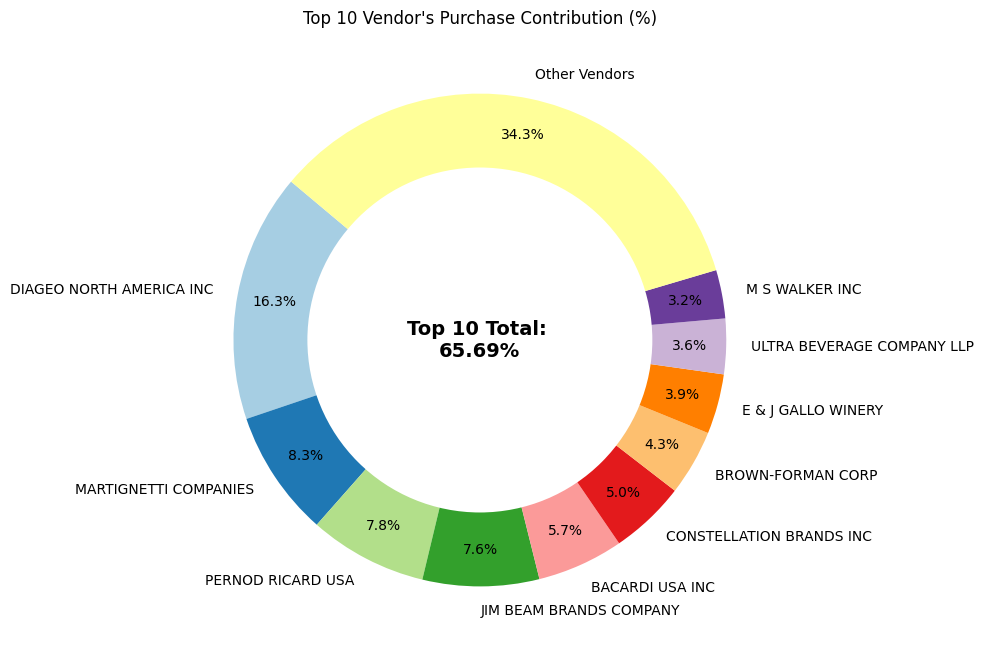

In [30]:

vendors = list (top_vendors [ 'VendorName'].values)
purchasecontribution = list (top_vendors ['purchasecontribution%']. values)
total_contribution = sum (purchasecontribution)
remaining_contribution = 100 - total_contribution

vendors.append("Other Vendors")
purchasecontribution.append(remaining_contribution)

# Append "Other Vendors" category vendors.append("Other Vendors") purchase_contributions.append(remaining_contribution)
#Donut Chart
fig, ax = plt.subplots (figsize=(8, 8))
wedges, texts, autotexts = ax.pie (purchasecontribution, labels=vendors, autopct='%1.1f%%',
                                    startangle=140, pctdistance=0.85, colors=plt.cm.Paired. colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white') 
fig.gca().add_artist (centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total: \n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

#### Does purchase in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [31]:
df['unit_purchase_price'] = df['total_purchase_dollars'] / df['total_purchase_qty']

In [32]:
df['order_size'] = pd.qcut(df['total_purchase_qty'],q=3, labels=['small','medium','large'])

In [33]:
df.groupby('order_size')[['unit_purchase_price']].mean()

,unit_purchase_price
order_size,
small,39.068186
medium,15.486414
large,10.777625


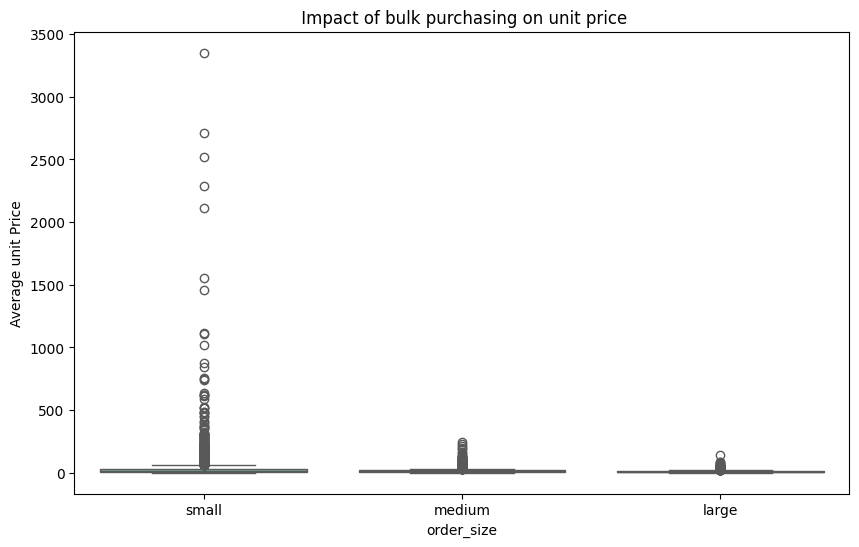

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="order_size" , y="unit_purchase_price" , palette="Set2")
plt.title(' Impact of bulk purchasing on unit price')
plt.ylabel("Average unit Price")
plt.show()

###
•Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

• The price difference between Small and Large orders is substantial (~72% reduction in unit cost)

• This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite  lower per-unit revenue.

#### Which vendor have low inventory turnover, indicating excess stock and slow-moving products?

In [35]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### How much capital is loked in unsold inventory per vendor, and which vendors contribute the most to it?

In [36]:
df['unsoldinventoryvalue'] = (df["total_purchase_qty"] - df["Total_sales_qty"])*df["PurchasePrice"]
print("total unsold capital: ", format_doller(df["unsoldinventoryvalue"].sum()))

total unsold capital:  2.71M


In [37]:
inventory_value_per_vendor = df.groupby("VendorName")["unsoldinventoryvalue"].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="unsoldinventoryvalue",ascending = False)
inventory_value_per_vendor["unsoldinventoryvalue"] = inventory_value_per_vendor["unsoldinventoryvalue"].apply(format_doller)
inventory_value_per_vendor.head(10)

,VendorName,unsoldinventoryvalue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidance intervals for profit margins of top-performing and low-performing vendors.

In [38]:
top_threshold = df["Total_sales_Dollers"].quantile(0.75)
low_threshold = df["Total_sales_Dollers"].quantile(0.25)

In [39]:
top_vendors = df[df["Total_sales_Dollers"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["Total_sales_Dollers"] <= low_threshold]["ProfitMargin"].dropna()

In [40]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = t.ppf((1 + confidence) / 2, df=len(data) - 1)  # Use imported t
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.74,  31.61), Mean: 31.18
Low Vendors 95% CI: (40.50,  42.64), Mean: 41.57


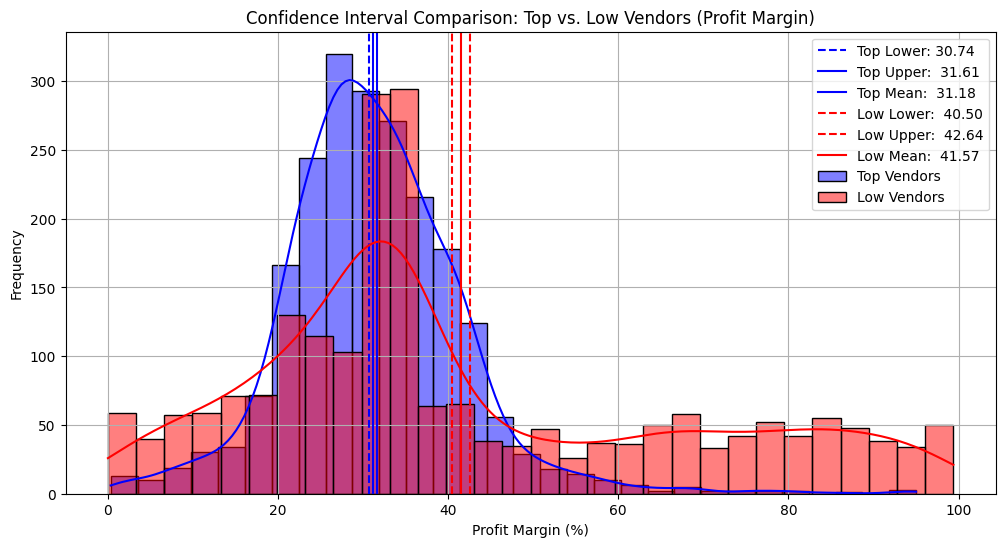

In [41]:

top_mean, top_lower, top_upper = confidence_interval (top_vendors) 
low_mean, low_lower, low_upper = confidence_interval (low_vendors)

print (f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper: .2f}), Mean: {top_mean:.2f}") 
print (f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper: .2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

#Top Vendors Plot
sns.histplot(top_vendors, kde= True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline (top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline (top_upper, color="blue", linestyle="-", label=f"Top Upper: {top_upper: .2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean: .2f}")

#Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline (low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower: .2f}")
plt.axvline (low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper: .2f}")
plt.axvline (low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean: .2f}")


# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True) 
plt.show()

• The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

• This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.

• For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.

• For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.

## Is there a significant difference in profit margins between top-performing and low-performing vendors? 
<b>Hypothesis:<b>

Ho (Null Hypothesis: There is no significant difference in the mean profit margins of top-performing and low-performing vendors.

H, (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [42]:
top_threshold = df["Total_sales_Dollers"].quantile(0.75)
low_threshold = df["Total_sales_Dollers"].quantile(0.25)

top_vendors = df[df["Total_sales_Dollers"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["Total_sales_Dollers"] <= low_threshold]["ProfitMargin"].dropna()

t_stat,p_value = ttest_ind(top_vendors , low_vendors , equal_var = False)

# Print results
print (f"T-Statistic: {t_stat:.4f}), P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")

T-Statistic: -17.6695), P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
